In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import plotting_functions as plot

In [3]:
train = pd.read_csv('train.csv')

In [4]:
train.shape

(1460, 81)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

The columns that are objects are categorical variables and the following functions turn them into categorical variabled. The MSSubClass variable is an int64 when it should be categorical so that is changed as well.

In [6]:
train['MSSubClass'] = train['MSSubClass'].astype('category')
train['OverallQual'] = train['OverallQual'].astype('category')
train['OverallCond'] = train['OverallCond'].astype('category')
train['YearBuilt'] = train['YearBuilt'].astype('category')
train['YearRemodAdd'] = train['YearRemodAdd'].astype('category')
train['GarageYrBlt'] = train['GarageYrBlt'].astype('category')
train['MoSold'] = train['MoSold'].astype('category')
train['YrSold'] = train['YrSold'].astype('category')
train['GarageCars'] = train['GarageCars'].astype('category')
train['Fireplaces'] = train['Fireplaces'].astype('category')
train['TotRmsAbvGrd'] = train['TotRmsAbvGrd'].astype('category')
train['KitchenAbvGr'] = train['KitchenAbvGr'].astype('category')
train['BedroomAbvGr'] = train['BedroomAbvGr'].astype('category')
train['HalfBath'] = train['HalfBath'].astype('category')
train['FullBath'] = train['FullBath'].astype('category')
train['BsmtHalfBath'] = train['BsmtHalfBath'].astype('category')
train['BsmtFullBath'] = train['BsmtFullBath'].astype('category')
train['BedroomAbvGr'] = train['BedroomAbvGr'].astype('category')


In [7]:
objects = train.select_dtypes(include='object')
cols = objects.columns
for i in cols:
    train[i] = train[i].astype('category')

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null category
MSZoning         1460 non-null category
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null category
Alley            91 non-null category
LotShape         1460 non-null category
LandContour      1460 non-null category
Utilities        1460 non-null category
LotConfig        1460 non-null category
LandSlope        1460 non-null category
Neighborhood     1460 non-null category
Condition1       1460 non-null category
Condition2       1460 non-null category
BldgType         1460 non-null category
HouseStyle       1460 non-null category
OverallQual      1460 non-null category
OverallCond      1460 non-null category
YearBuilt        1460 non-null category
YearRemodAdd     1460 non-null category
RoofStyle        1460 non-null category
RoofMatl         1460 

# Sale Price Exploratory Analysis

In [9]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [10]:
len(train[train['SalePrice'] > 400000])

28

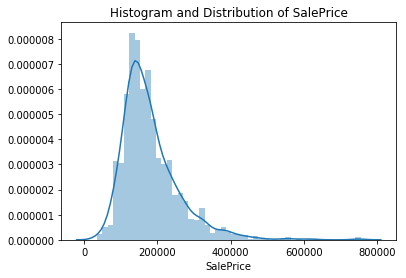

In [11]:
plot.histogram(train, 'SalePrice')

The median sales price for houses in Iowa is 163,000 and the mean is ~181,000. There are 28 sales that are greater than 400,000, which is more than double the median and the mean. The histogram shows that the histogram is right skewed meaning that the mean is greater than the median and the cluster of values is on the left side of the graph. This could mean that the log transform might be a better option when predicting.

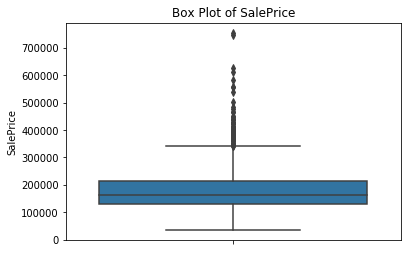

In [12]:
plot.boxplot(train, 'SalePrice')

When looking at the boxplot of the sales price, you can see that there are some very large values (> 500,000) that is causing the price to be skewed.

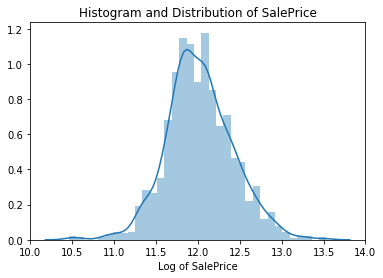

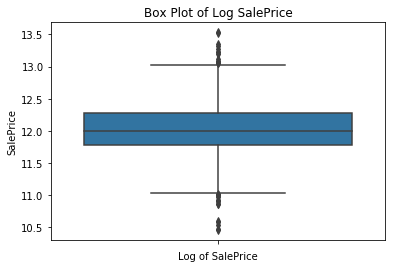

In [13]:
plot.histogram(train, 'SalePrice', True)
plot.boxplot(train, 'SalePrice', True)

When you take the log transform of the sales price, the data becomes a little more normal looking. The skew is almost gone from the histogram and boxplot. There also don't seem to be as many outliers in the data after the tranform.

# Numerical Variables

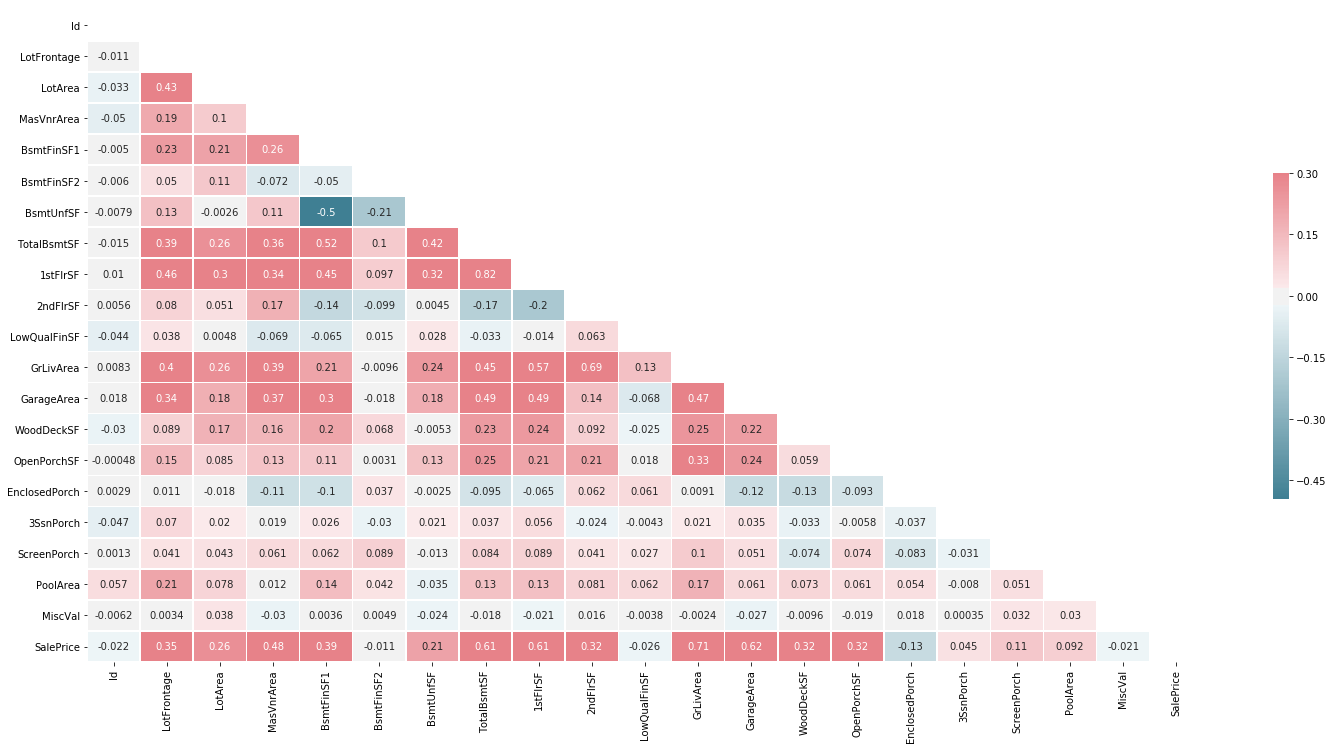

In [14]:
nums = train.select_dtypes(exclude='category')
plot.heatmap(nums)

Looking at the correlation heatmap, you can see some semi-strong correlations between some of the variables. This is important when looking at features that might need to be removed from modeling as they can potentially hurt the model performance. 
- Lot area and lot frontage are positively correlated, which makes sense. 
- Unfinished basement square footage and type 1 basement square footage are negatively correlated.
- The square footage features seem to be positively correlated with each other

For Sale price, you can see that there are many features that have a high, positive correlation. This can also be seen in the scatterplots below.

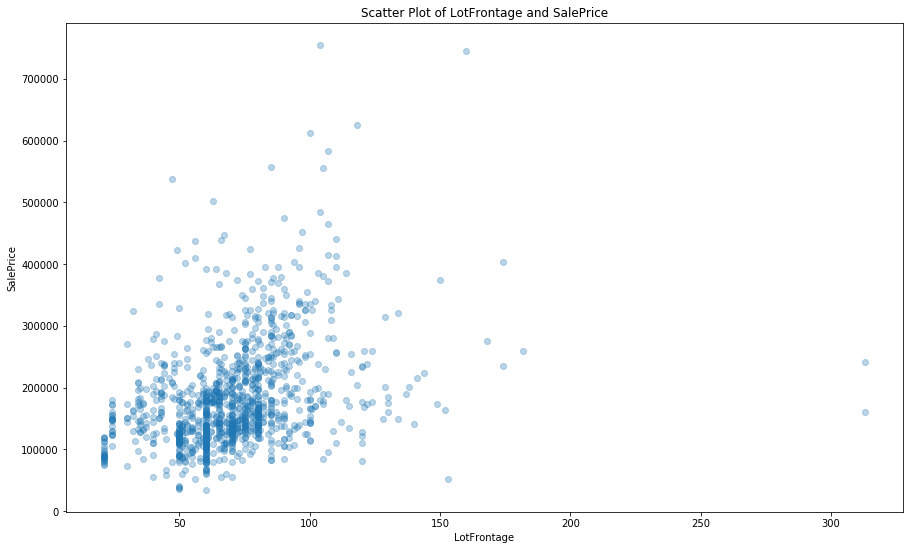

In [15]:
plot.scatterplot(train,'LotFrontage','SalePrice',False)

The scatter plot above shows Lot Frontage and Sales Price. It shows a positive relationship between the two features but it is not very strong.

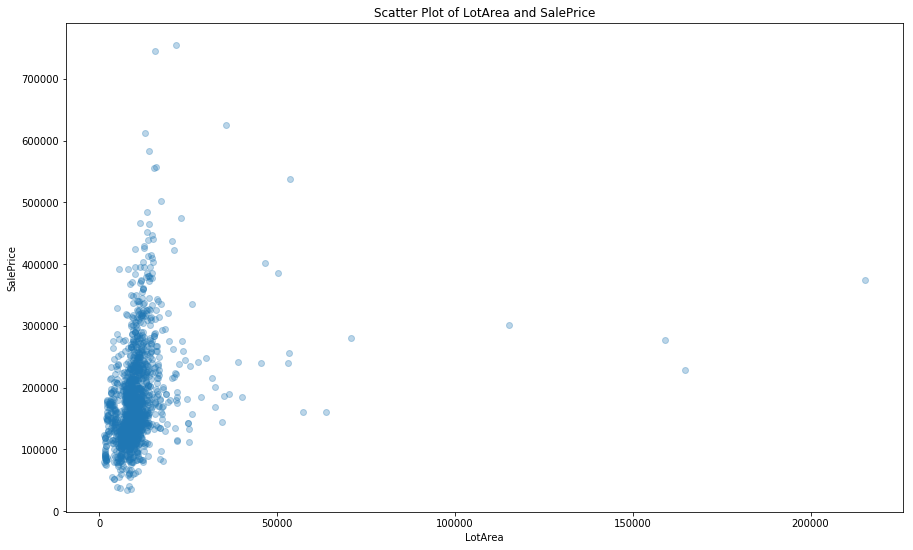

In [16]:
plot.scatterplot(train,'LotArea','SalePrice',False)

When looking at lot area and sale price, there is also a positive relationship but like lot frontage it is not that strong of a relationship. This might be due to some of the outliers in the dataset (lots > 35k/40k).

            LotArea  SalePrice
LotArea    1.000000   0.379397
SalePrice  0.379397   1.000000


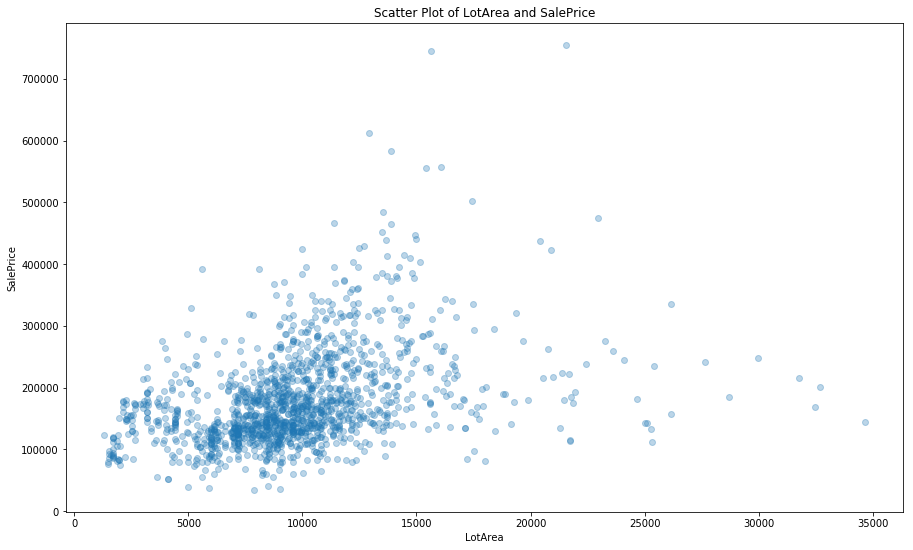

In [17]:
smaller_lots = train[train['LotArea'] < 35000]
print(smaller_lots[['LotArea','SalePrice']].corr())
plot.scatterplot(smaller_lots,'LotArea','SalePrice',False)

When removing the lots that are greater than 35k sqft, the relationship is still positive but only slightly stronger than before.

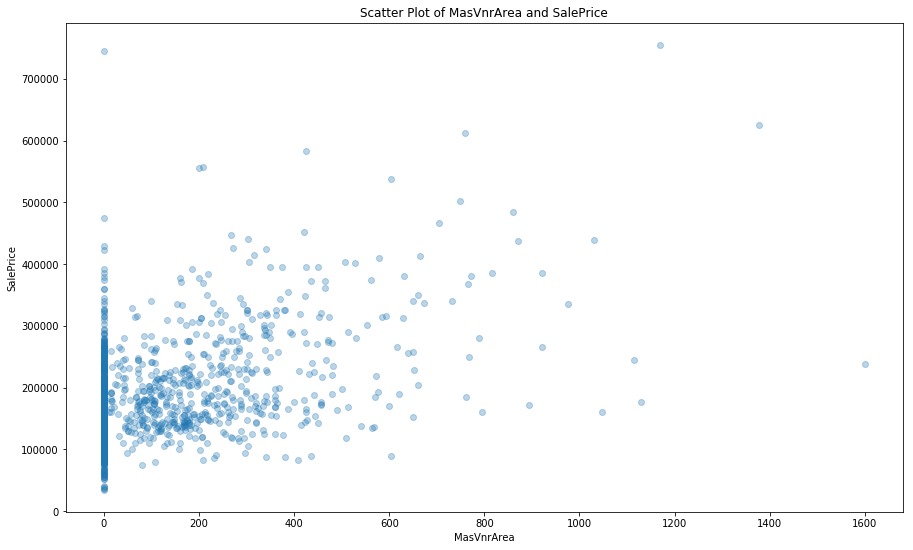

In [18]:
plot.scatterplot(train,'MasVnrArea','SalePrice',False)

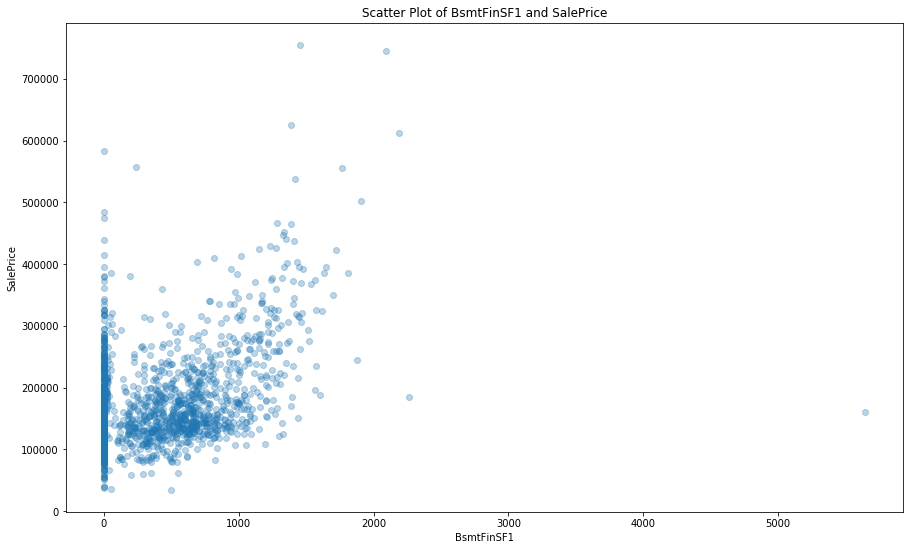

In [19]:
plot.scatterplot(train,'BsmtFinSF1','SalePrice',False)

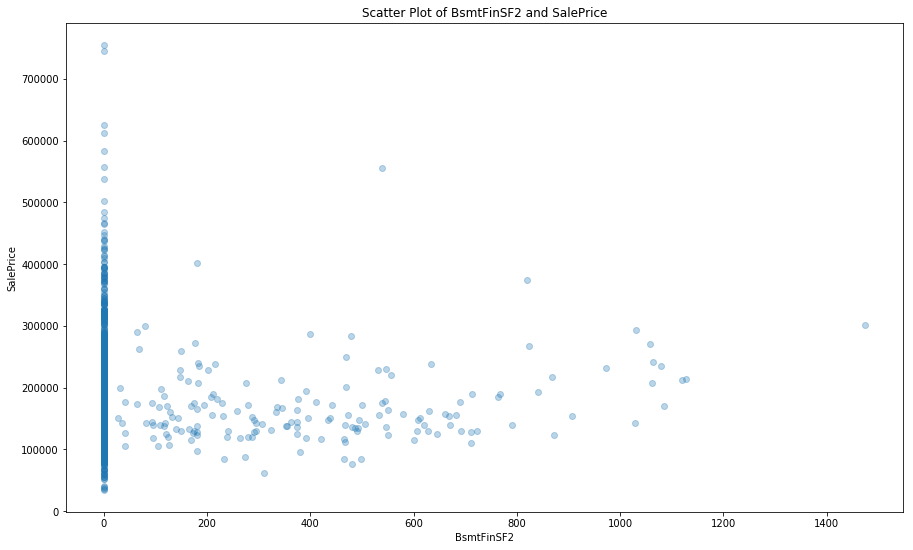

In [20]:
plot.scatterplot(train,'BsmtFinSF2','SalePrice',False)

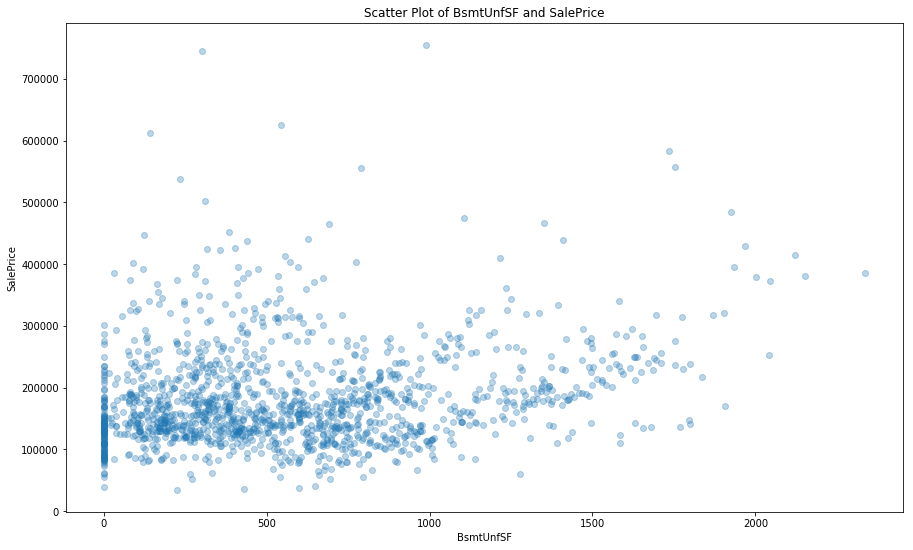

In [21]:
plot.scatterplot(train,'BsmtUnfSF','SalePrice',False)

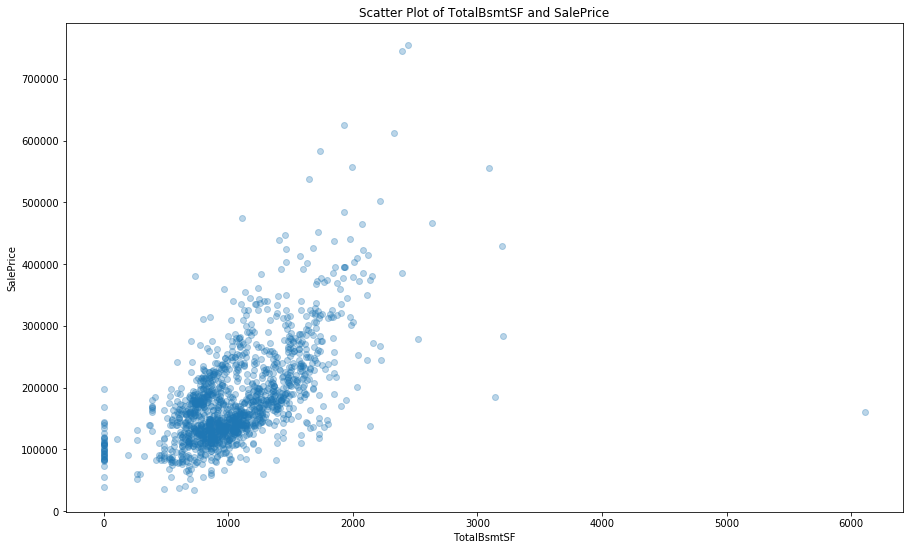

In [22]:
plot.scatterplot(train,'TotalBsmtSF','SalePrice',False)

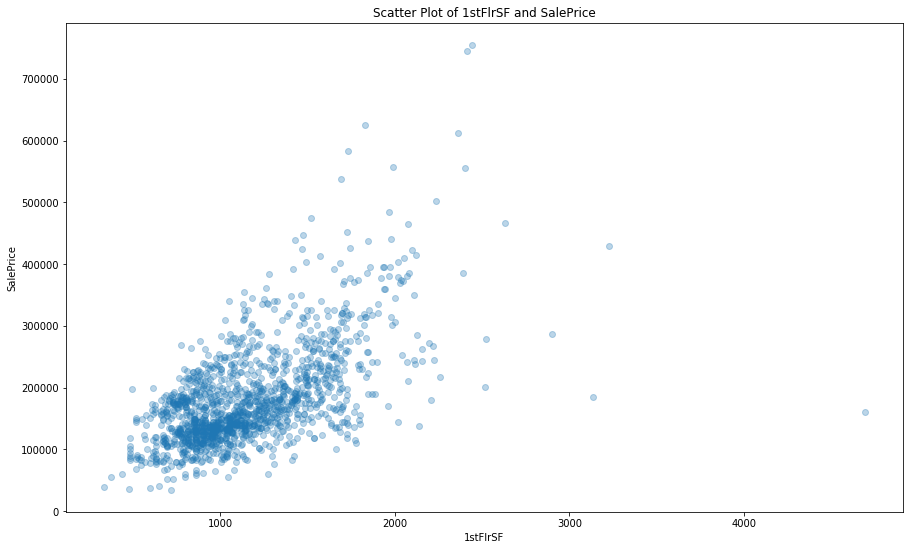

In [23]:
plot.scatterplot(train,'1stFlrSF','SalePrice',False)

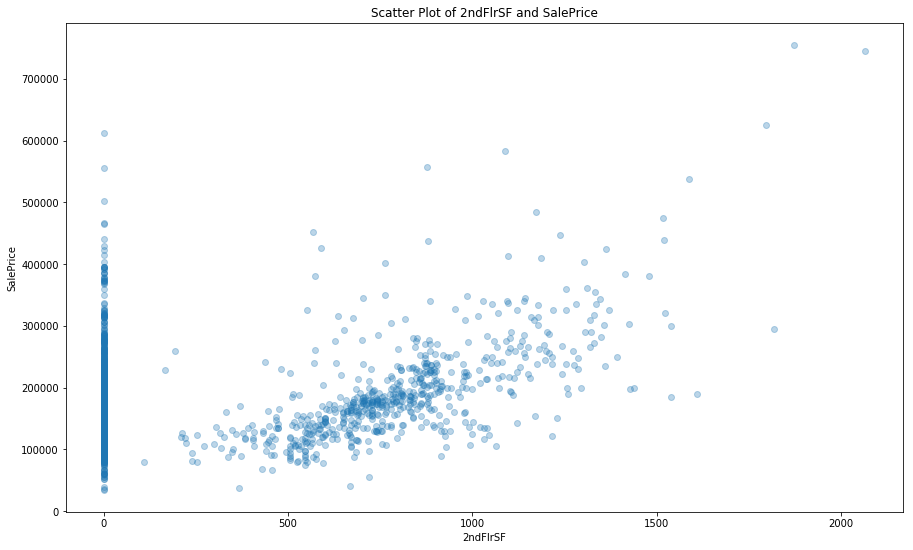

In [24]:
plot.scatterplot(train,'2ndFlrSF','SalePrice',False)

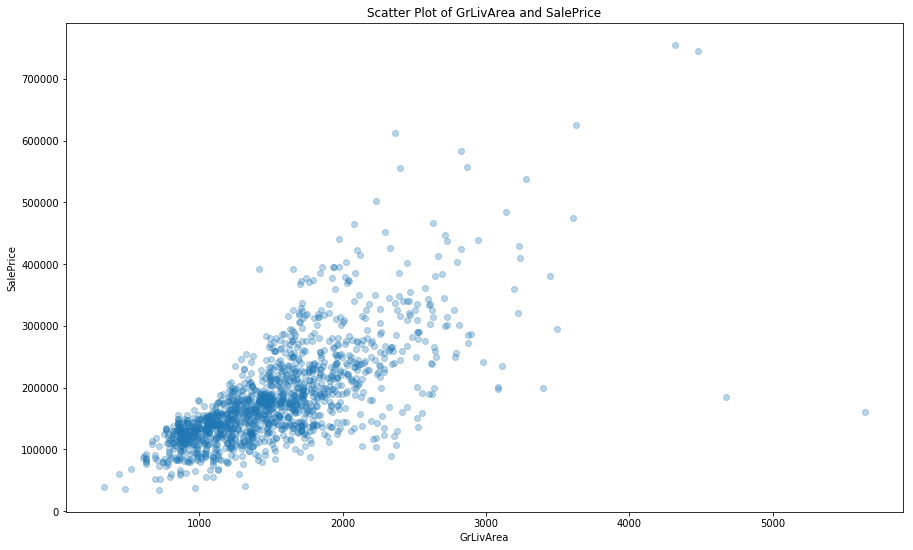

In [25]:
plot.scatterplot(train,'GrLivArea','SalePrice',False)

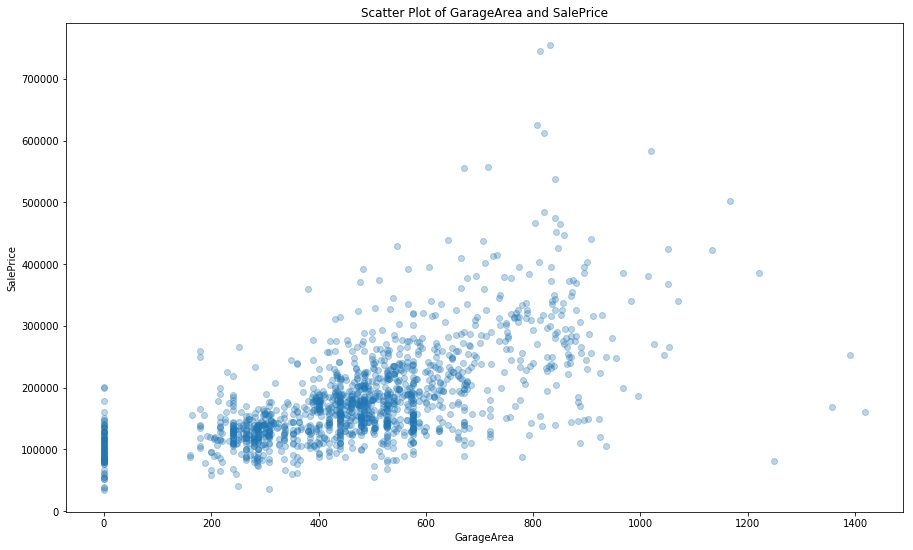

In [26]:
plot.scatterplot(train,'GarageArea','SalePrice',False)

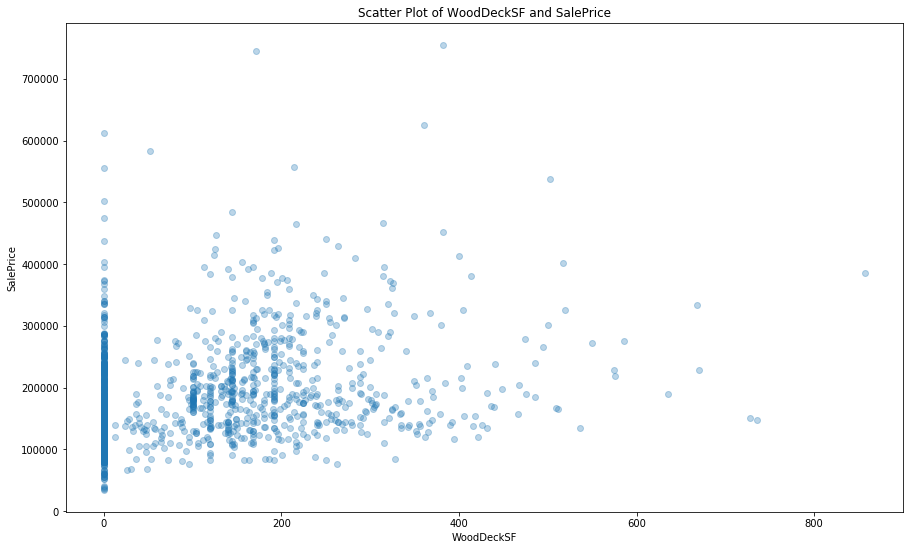

In [27]:
plot.scatterplot(train,'WoodDeckSF','SalePrice',False)

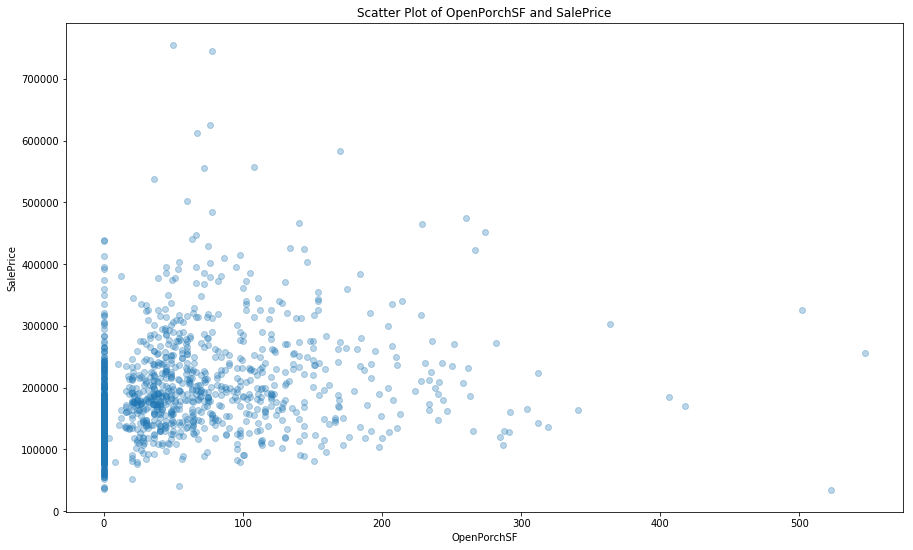

In [28]:
plot.scatterplot(train,'OpenPorchSF','SalePrice',False)

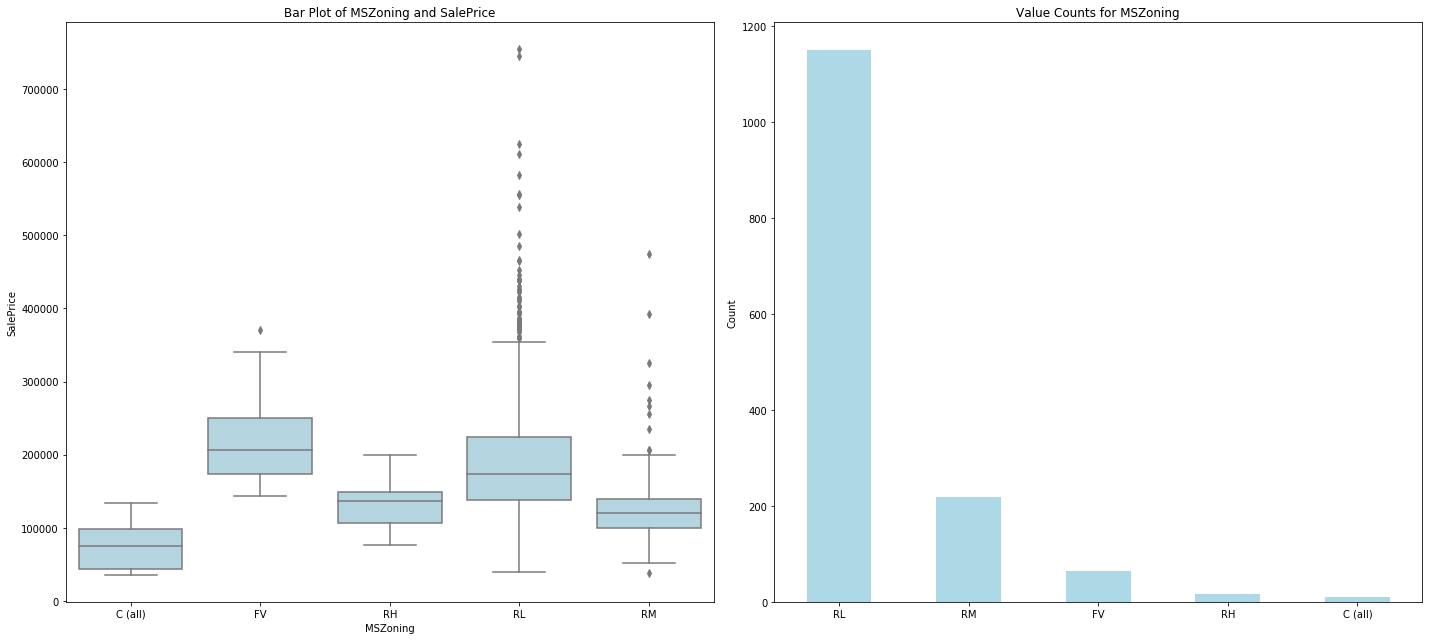

In [29]:
plot.bar_box(train,'MSZoning','SalePrice')

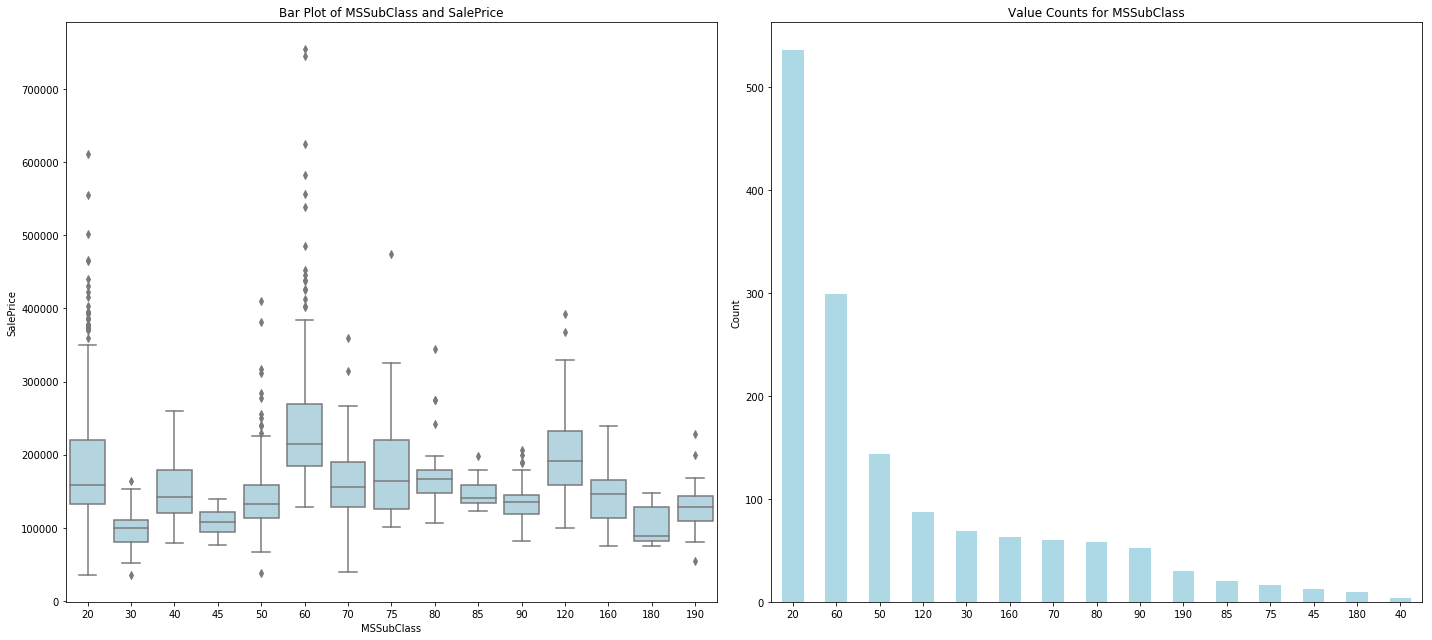

In [30]:
plot.bar_box(train,'MSSubClass','SalePrice')

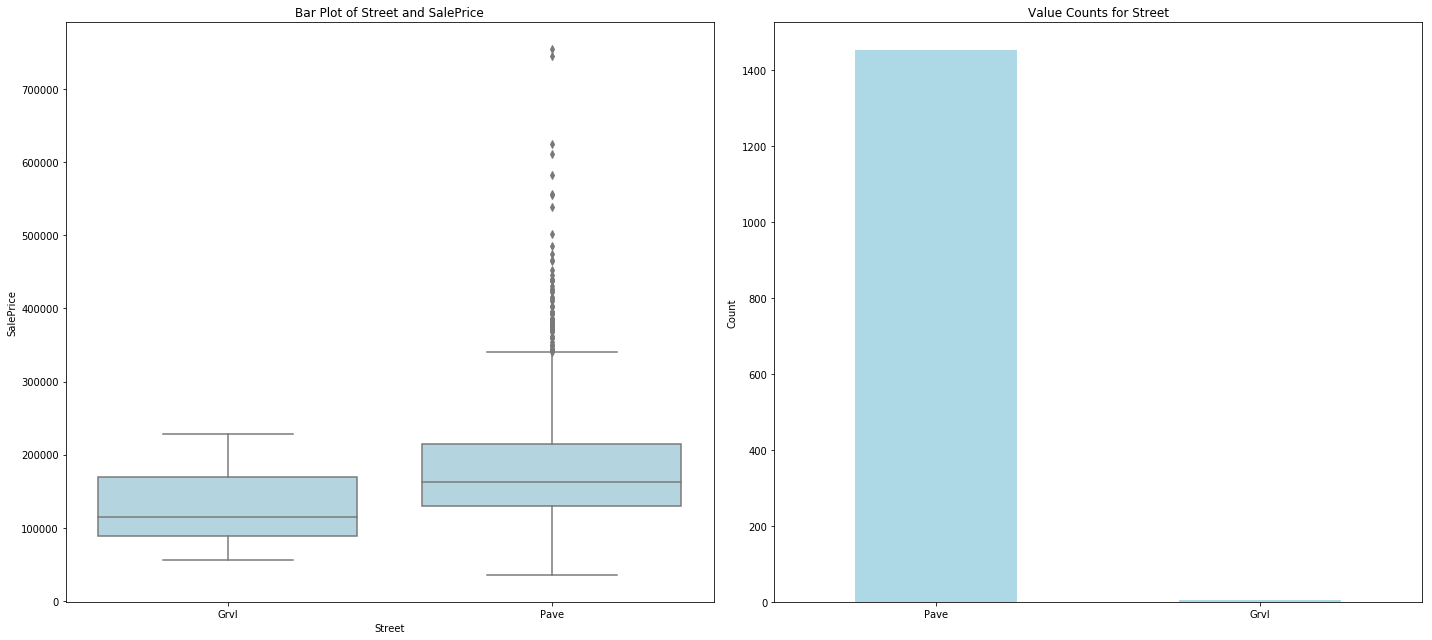

In [31]:
plot.bar_box(train,'Street','SalePrice')

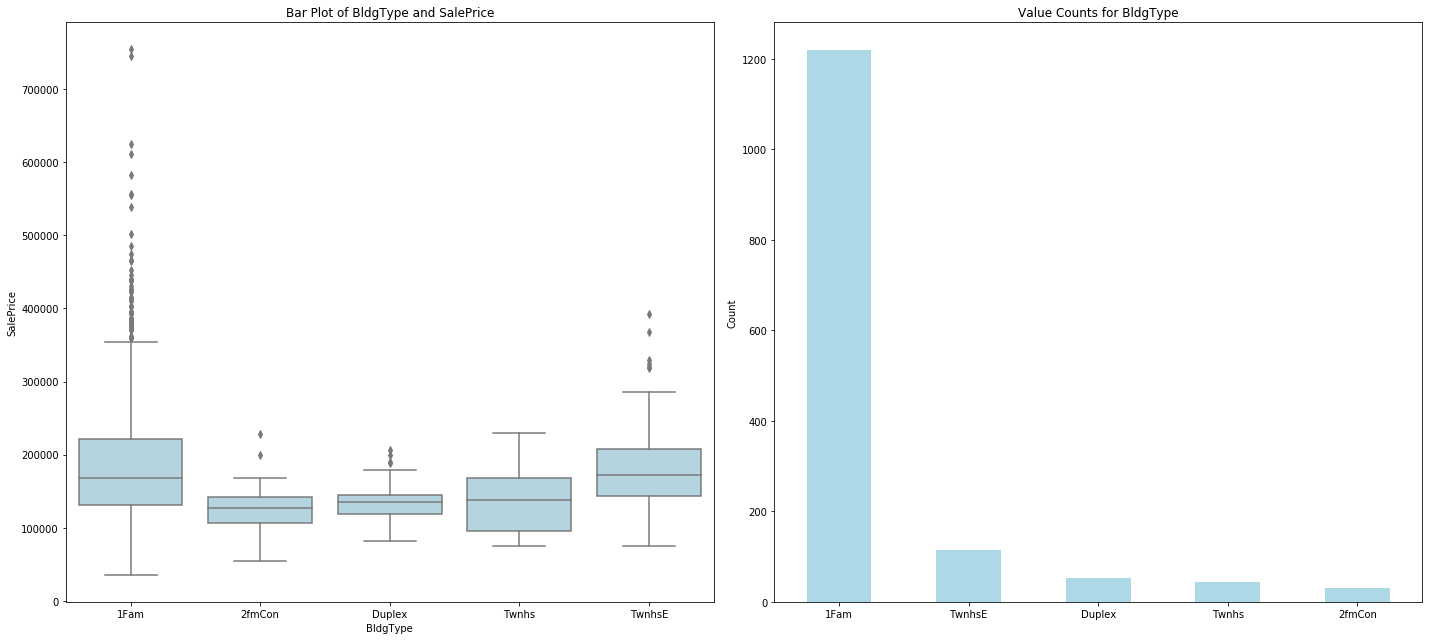

In [32]:
plot.bar_box(train,'BldgType','SalePrice')

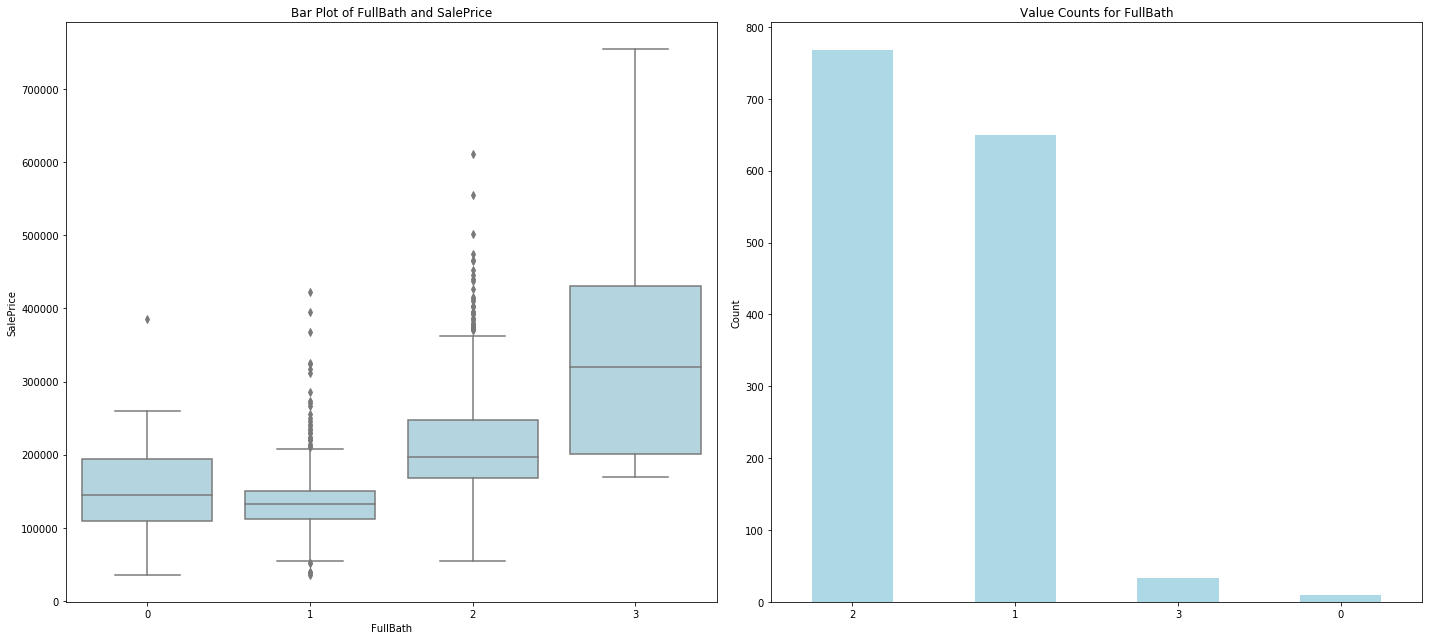

In [33]:
plot.bar_box(train,'FullBath','SalePrice')

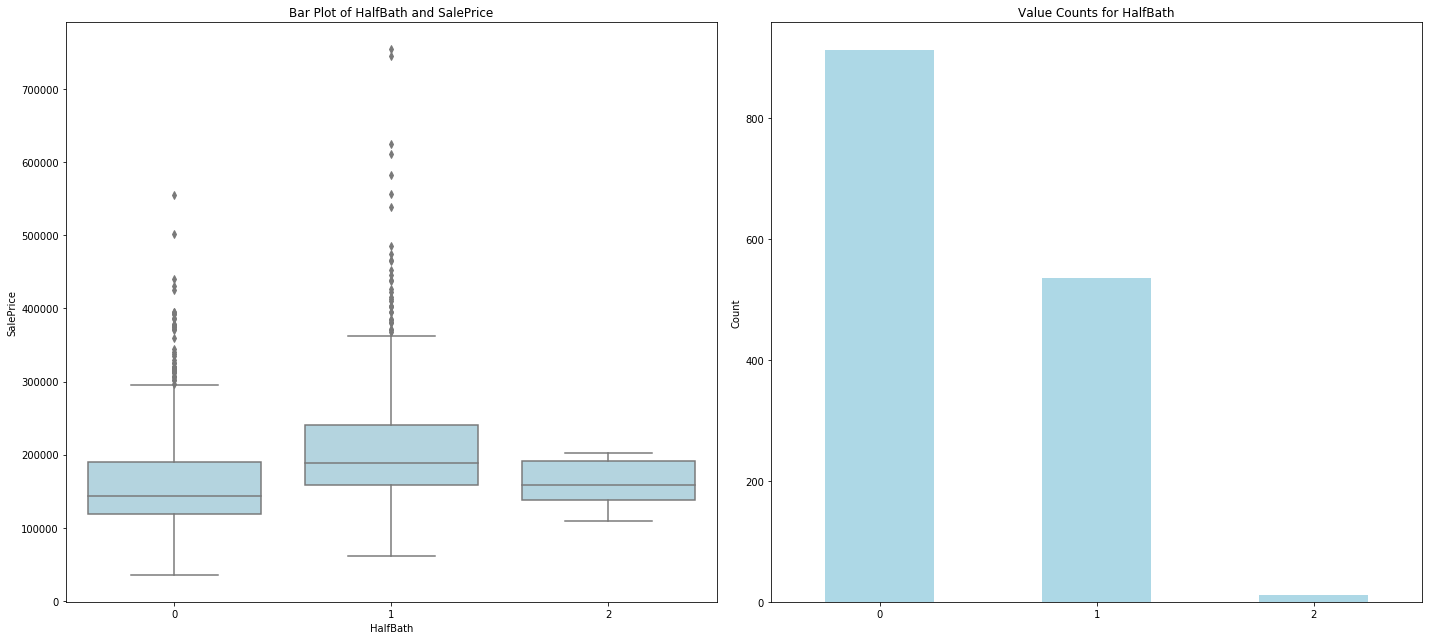

In [34]:
plot.bar_box(train,'HalfBath','SalePrice')

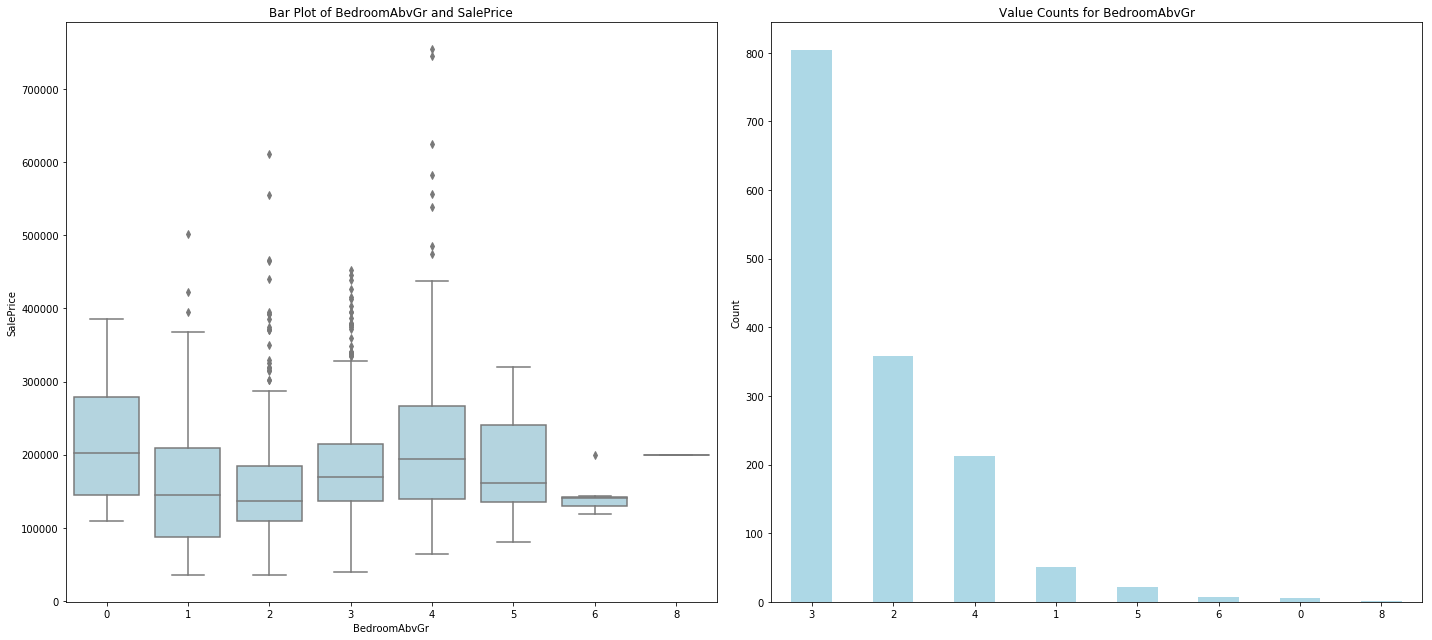

In [35]:
plot.bar_box(train,'BedroomAbvGr','SalePrice')

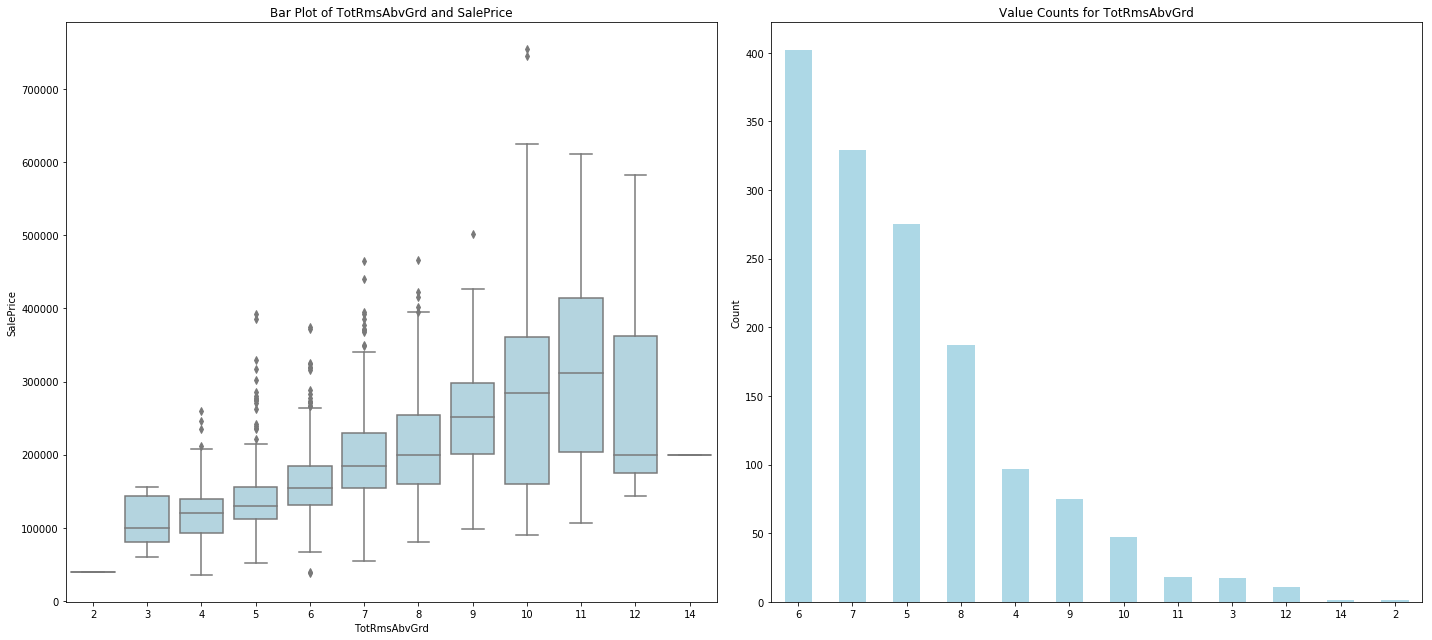

In [36]:
plot.bar_box(train,'TotRmsAbvGrd','SalePrice')

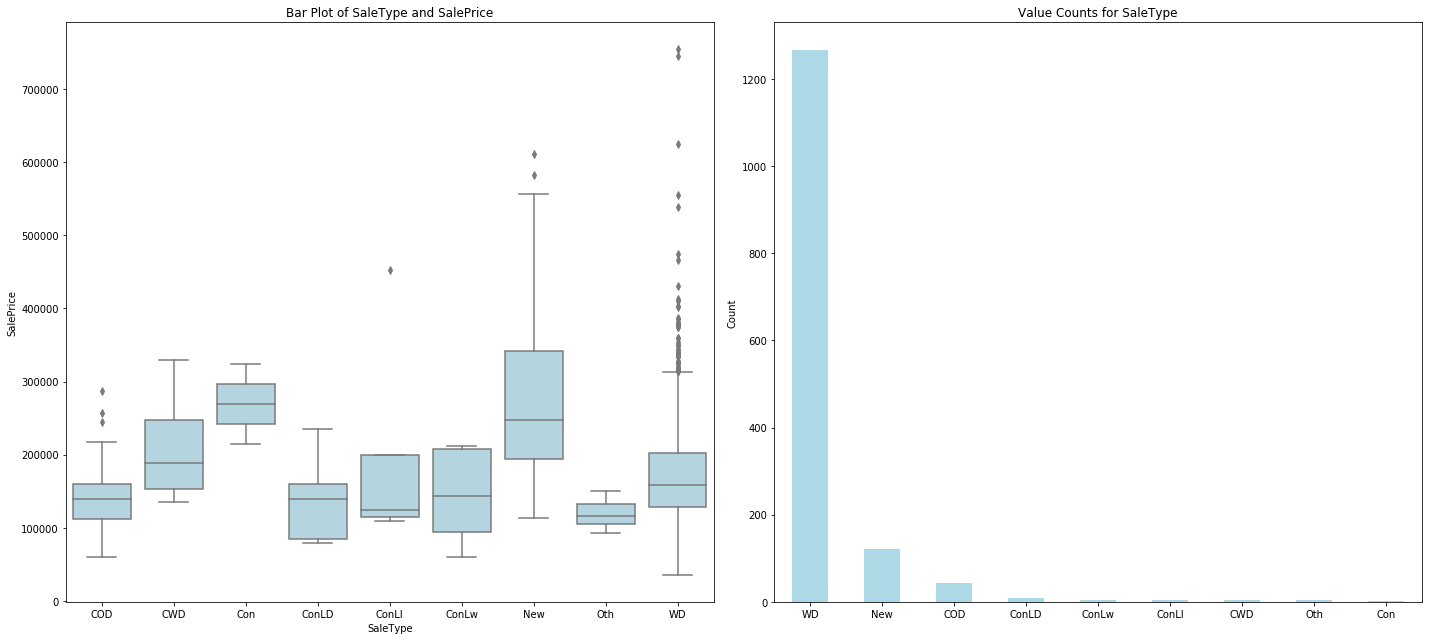

In [37]:
plot.bar_box(train,'SaleType','SalePrice')

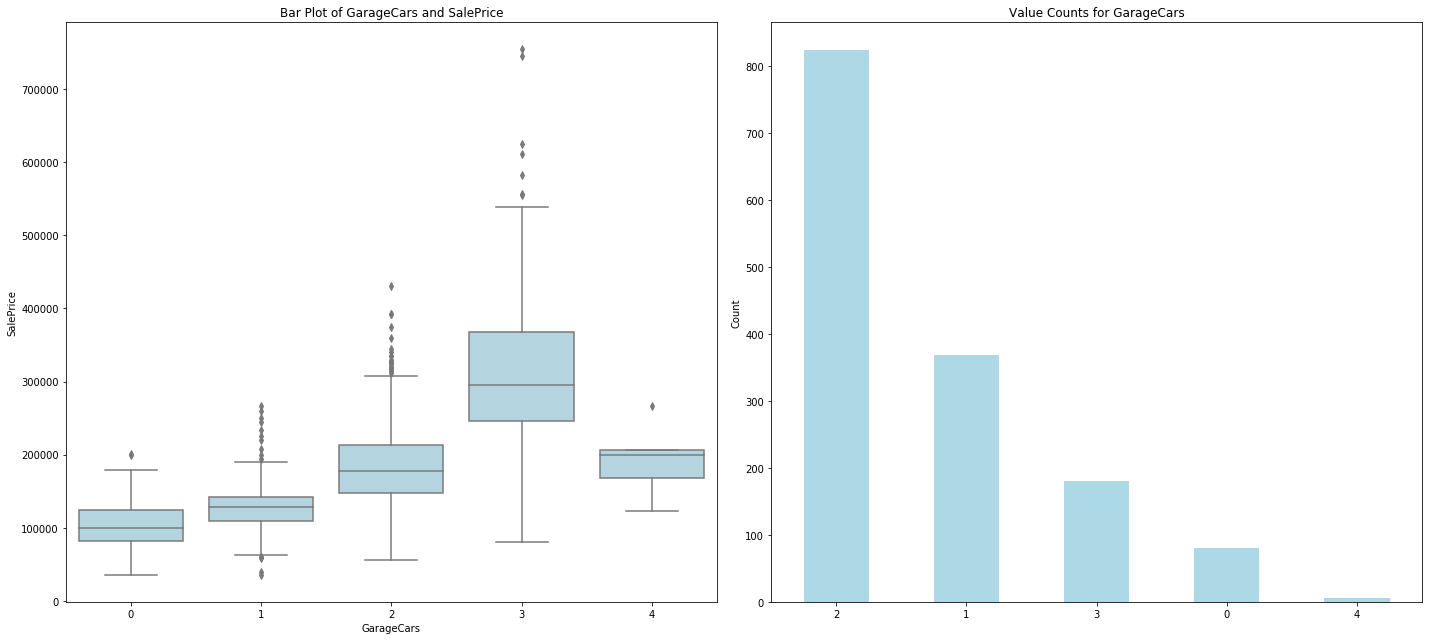

In [38]:
plot.bar_box(train,'GarageCars','SalePrice')

# Feature Engineering

In [39]:
train['bathrooms'] = (train['HalfBath'].astype('int') * 0.5 + train['FullBath'].astype('int') \
                    + train['BsmtFullBath'].astype('int') + train['BsmtHalfBath'].astype('int') * 0.5 \
                     ).astype('category')

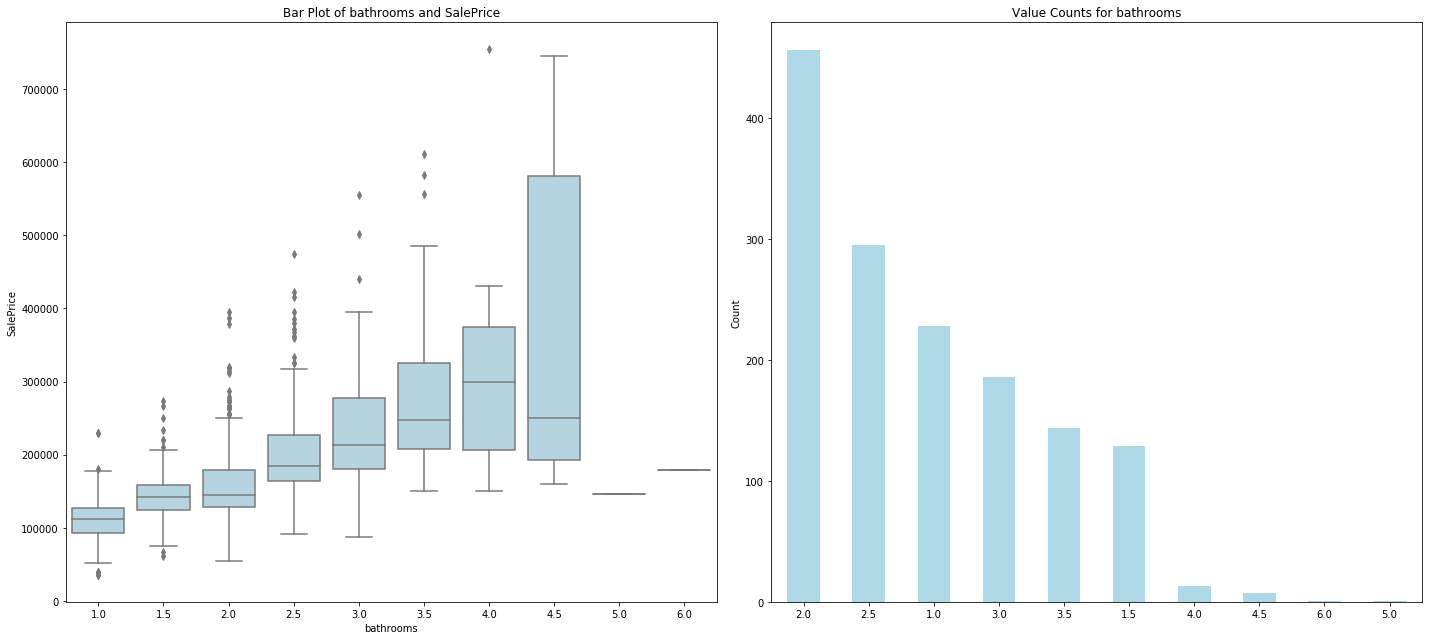

In [40]:
plot.bar_box(train,'bathrooms','SalePrice')

In [41]:
list(train.columns)

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [42]:
train[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','1stFlrSF','2ndFlrSF','LowQualFinSF']].head()

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF
0,706,0,150,856,854,0
1,978,0,284,1262,0,0
2,486,0,434,920,866,0
3,216,0,540,961,756,0
4,655,0,490,1145,1053,0


In [43]:
train['total_sq_ft'] = train['BsmtFinSF1'] + train['BsmtFinSF2'] + train['1stFlrSF'] + train['2ndFlrSF']

In [44]:
train[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','1stFlrSF','2ndFlrSF','LowQualFinSF','total_sq_ft']].head()

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,total_sq_ft
0,706,0,150,856,854,0,2416
1,978,0,284,1262,0,0,2240
2,486,0,434,920,866,0,2272
3,216,0,540,961,756,0,1933
4,655,0,490,1145,1053,0,2853


In [45]:
train['total_sq_ft_plus_unf'] = train['BsmtFinSF1'] + train['BsmtFinSF2'] + train['1stFlrSF'] + train['2ndFlrSF'] \
                                + train['BsmtUnfSF']

In [46]:
train[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','1stFlrSF','2ndFlrSF','LowQualFinSF','total_sq_ft', \
       'total_sq_ft_plus_unf']].head()

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,total_sq_ft,total_sq_ft_plus_unf
0,706,0,150,856,854,0,2416,2566
1,978,0,284,1262,0,0,2240,2524
2,486,0,434,920,866,0,2272,2706
3,216,0,540,961,756,0,1933,2473
4,655,0,490,1145,1053,0,2853,3343


In [47]:
train[['SalePrice','total_sq_ft','total_sq_ft_plus_unf']].corr()

,SalePrice,total_sq_ft,total_sq_ft_plus_unf
SalePrice,1.000000,0.708047,0.782260
total_sq_ft,0.708047,1.000000,0.848295
total_sq_ft_plus_unf,0.782260,0.848295,1.000000


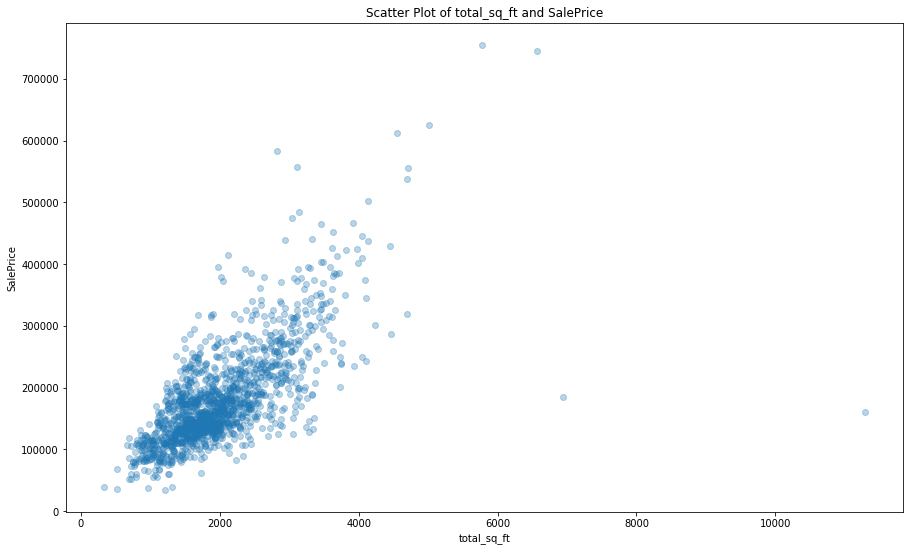

In [48]:
plot.scatterplot(train,'total_sq_ft','SalePrice')

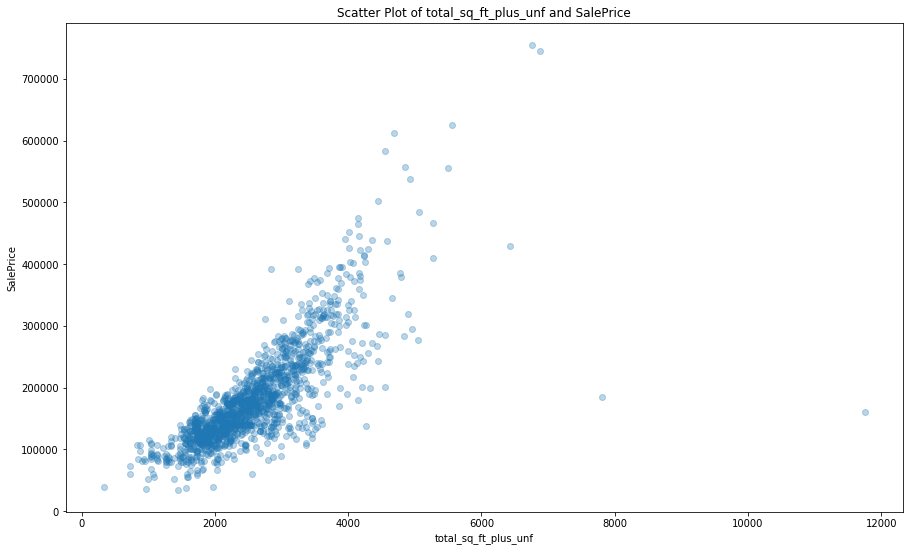

In [49]:
plot.scatterplot(train,'total_sq_ft_plus_unf','SalePrice')

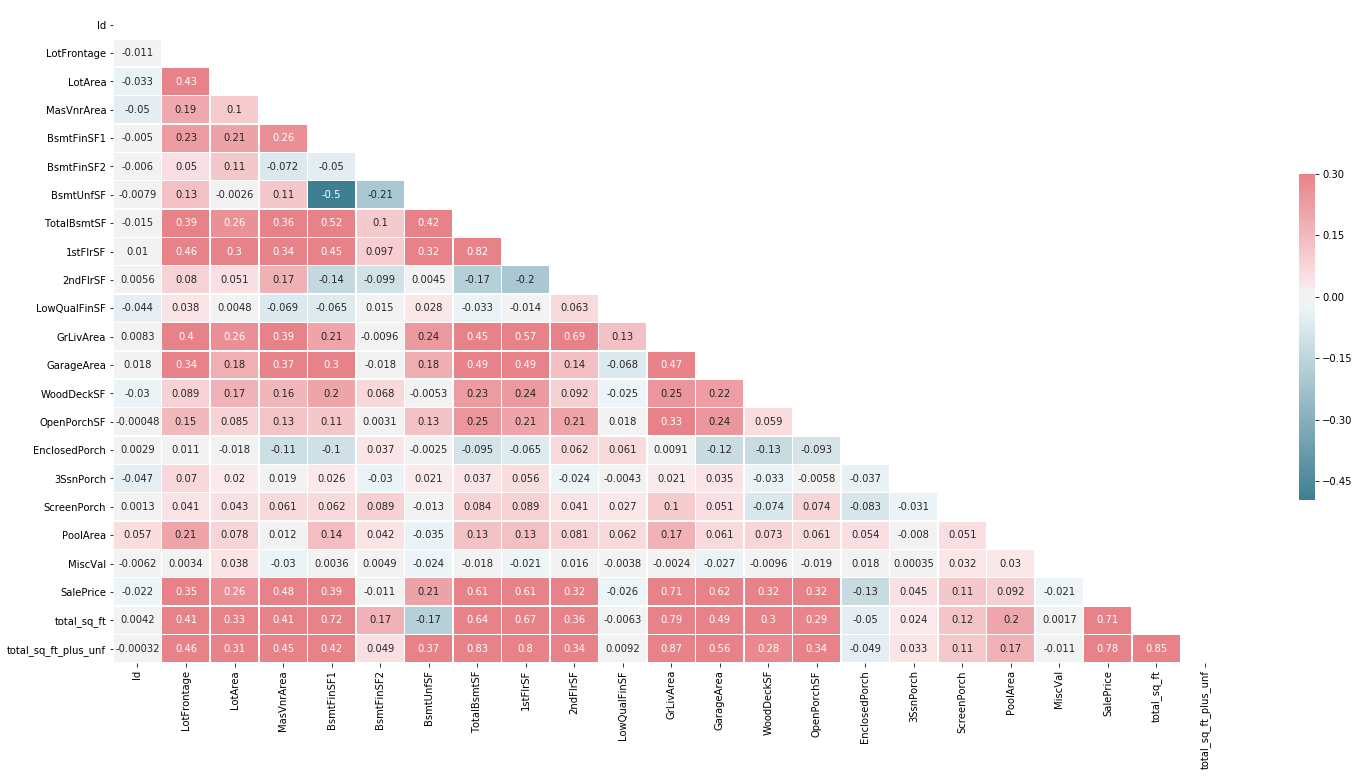

In [50]:
nums2 = train.select_dtypes(exclude='category')
plot.heatmap(nums2)